In [17]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

# Configurações
API_KEY = "16d1fd5f682c798f7cd920b157a3a771"  # Substitua pela sua chave da API
LAT, LON = -23.5505, -46.6333  # Coordenadas de São Paulo
URL = f"https://api.openweathermap.org/data/2.5/forecast?lat={LAT}&lon={LON}&appid={API_KEY}&units=metric&lang=pt"

In [18]:
from datetime import datetime

# Obter a data de hoje
data_hoje = datetime.today().date()

print(data_hoje)


2025-02-22


In [19]:
# Função para coletar dados de previsão
def coletar_previsao():
    response = requests.get(URL)
    if response.status_code == 200:
        dados = response.json()
        return dados
    else:
        print("Erro na requisição!", response.status_code)
        return None

# Coletar dados de previsão
dados_clima = coletar_previsao()

In [20]:
# Se os dados foram coletados com sucesso
if dados_clima:
    # Vamos processar as previsões
    previsoes_climaticas = []
    
    for item in dados_clima["list"]:
        data_hora = pd.to_datetime(item["dt_txt"])  # Data e hora da previsão
        temp_max = item["main"]["temp_max"]
        temp_min = item["main"]["temp_min"]
        descricao = item["weather"][0]["description"]
        vento = item["wind"]["speed"]
        
        # Adicionando a previsão à lista
        previsoes_climaticas.append({
            "data_hora": data_hora,
            "temp_max": temp_max,
            "temp_min": temp_min,
            "descricao": descricao,
            "vento": vento
        })
    
    # Criar um DataFrame a partir dos dados processados
    df_previsao = pd.DataFrame(previsoes_climaticas)
    
    # Mostrar o conteúdo do DataFrame
    print(df_previsao.head(13))  # Exibe as 5 primeiras linhas para visualização

else:
    print("Não foi possível coletar as previsões.")


             data_hora  temp_max  temp_min          descricao  vento
0  2025-02-23 03:00:00     22.09     21.63  céu pouco nublado   3.23
1  2025-02-23 06:00:00     21.74     21.04   nuvens dispersas   2.60
2  2025-02-23 09:00:00     21.17     20.71   nuvens quebradas   1.90
3  2025-02-23 12:00:00     23.70     23.70   nuvens quebradas   2.60
4  2025-02-23 15:00:00     27.90     27.90        chuva fraca   2.52
5  2025-02-23 18:00:00     23.92     23.92     chuva moderada   3.12
6  2025-02-23 21:00:00     21.45     21.45     chuva moderada   2.50
7  2025-02-24 00:00:00     20.97     20.97        chuva fraca   3.10
8  2025-02-24 03:00:00     20.41     20.41        chuva fraca   1.72
9  2025-02-24 06:00:00     19.91     19.91   nuvens quebradas   1.88
10 2025-02-24 09:00:00     19.29     19.29   nuvens quebradas   1.73
11 2025-02-24 12:00:00     23.57     23.57   nuvens quebradas   2.09
12 2025-02-24 15:00:00     29.35     29.35        chuva fraca   1.60


In [21]:
# Garantir que a coluna 'data_hora' seja interpretada como data
df_previsao["data_hora"] = pd.to_datetime(df_previsao["data_hora"])

# Filtrar os dados para o dia 2025-02-21
data_filtro = pd.to_datetime("2025-02-23")  # Convertendo a data para o formato correto
df_filtrado = df_previsao[df_previsao["data_hora"].dt.date == data_filtro.date()]

# Obter a máxima e mínima do dia
temp_max_dia = df_filtrado["temp_max"].max()  # Temperatura máxima
temp_min_dia = df_filtrado["temp_min"].min()  # Temperatura mínima

# Exibir as temperaturas máxima e mínima
print(f"Data: {data_filtro.date()} - Temp Max: {temp_max_dia}°C - Temp Min: {temp_min_dia}°C")


Data: 2025-02-23 - Temp Max: 27.9°C - Temp Min: 20.71°C


In [22]:
df_filtrado = df_previsao[df_previsao["data_hora"].dt.date == data_filtro.date()]

# Obter a máxima e mínima do dia
temp_max_dia = df_filtrado["temp_max"].max()  # Temperatura máxima
temp_min_dia = df_filtrado["temp_min"].min()  # Temperatura mínima

# Exibir as temperaturas máxima e mínima
print(f"Data: {data_filtro.date()} - Temp Max: {temp_max_dia}°C - Temp Min: {temp_min_dia}°C")


Data: 2025-02-23 - Temp Max: 27.9°C - Temp Min: 20.71°C


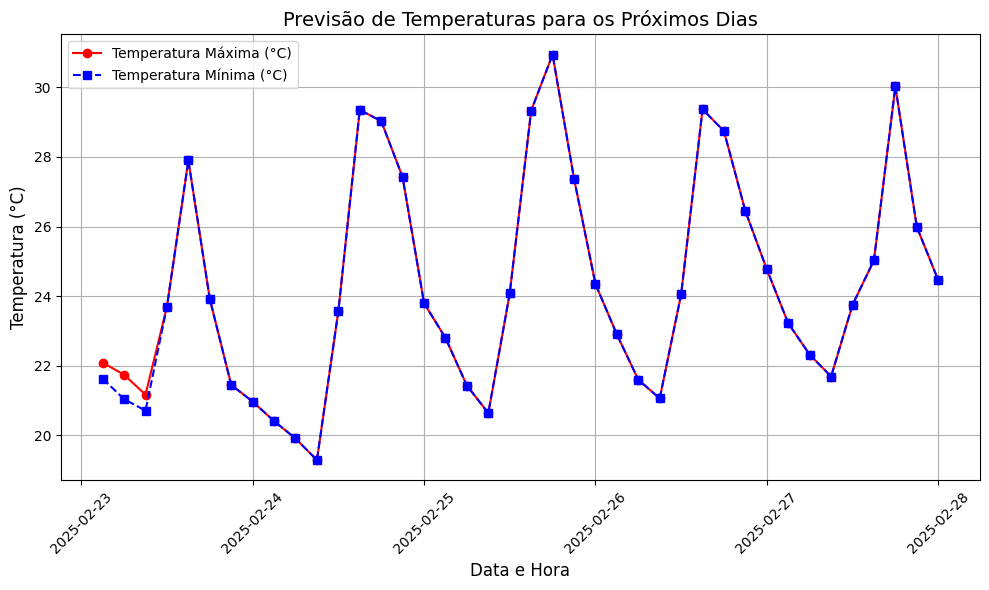

In [23]:
df_previsao["data_hora"] = pd.to_datetime(df_previsao["data_hora"])

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Plotar as temperaturas máxima e mínima
plt.plot(df_previsao["data_hora"], df_previsao["temp_max"], marker='o', linestyle='-', label='Temperatura Máxima (°C)', color='red')
plt.plot(df_previsao["data_hora"], df_previsao["temp_min"], marker='s', linestyle='--', label='Temperatura Mínima (°C)', color='blue')

# Adicionar título e rótulos
plt.title("Previsão de Temperaturas para os Próximos Dias", fontsize=14)
plt.xlabel("Data e Hora", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)

# Adicionar uma legenda
plt.legend()

# Ajustar a rotação das datas no eixo X para facilitar a leitura
plt.xticks(rotation=45)

# Exibir a grade no gráfico
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()
